#### **Ultralytics Yolo v3 설치**

In [1]:
!git clone https://github.com/ultralytics/yolov3
!cd yolov3;pip install -qr requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 9862, done.
remote: Total 9862 (delta 0), reused 0 (delta 0), pack-reused 9862
Receiving objects: 100% (9862/9862), 9.19 MiB | 5.89 MiB/s, done.
Resolving deltas: 100% (6667/6667), done.
     |████████████████████████████████| 596 kB 4.2 MB/s 


In [2]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu111 (Tesla K80)


#### **Oxford Pet Dataset 다운로드**

In [3]:
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

--2021-10-27 07:34:26--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/x-gzip]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  12.1MB/s    in 67s     

2021-10-27 07:35:34 (11.3 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2021-10-27 07:35:34--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/x-gzip]
Saving to: ‘annotations.tar.gz’

annotations.tar.gz  100%[===================>]  18.28M  5.69MB/s    in 3.2s    

2021-10-27 07:35:39 (5.69 M

In [4]:
!mkdir /content/data
!tar -xvf images.tar.gz -C /content/data
!tar -xvf annotations.tar.gz -C /content/data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
annotations/trimaps/._pomeranian_180.png
annotations/trimaps/pomeranian_180.png
annotations/trimaps/._pomeranian_181.png
annotations/trimaps/pomeranian_181.png
annotations/trimaps/._pomeranian_182.png
annotations/trimaps/pomeranian_182.png
annotations/trimaps/._pomeranian_183.png
annotations/trimaps/pomeranian_183.png
annotations/trimaps/._pomeranian_184.png
annotations/trimaps/pomeranian_184.png
annotations/trimaps/._pomeranian_185.png
annotations/trimaps/pomeranian_185.png
annotations/trimaps/._pomeranian_186.png
annotations/trimaps/pomeranian_186.png
annotations/trimaps/._pomeranian_187.png
annotations/trimaps/pomeranian_187.png
annotations/trimaps/._pomeranian_188.png
annotations/trimaps/pomeranian_188.png
annotations/trimaps/._pomeranian_189.png
annotations/trimaps/pomeranian_189.png
annotations/trimaps/._pomeranian_19.png
annotations/trimaps/pomeranian_19.png
annotations/trimaps/._pomeranian_190.png
annotations/trimaps/pomeranian_190.png
annota

In [5]:
!mkdir /content/ox_pet;
!cd /content/ox_pet; mkdir images; mkdir labels;
!cd /content/ox_pet/images; mkdir train; mkdir val
!cd /content/ox_pet/labels; mkdir train; mkdir val

In [6]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

def make_train_valid_df(list_filepath,img_dir,anno_dir,test_size=0.1):
  pet_df=pd.read_csv(list_filepath,sep=' ',header=None,names=['img_name','class_id','etc1','etc2'])
  pet_df['class_name']=pet_df['img_name'].apply(lambda x: x[:x.rfind('_')])

  pet_df['img_filepath']=img_dir+pet_df['img_name']+'.jpg'
  pet_df['anno_filepath']=anno_dir+pet_df['img_name']+'.xml'

  pet_df=remove_no_annos(pet_df)

  train_df,val_df=train_test_split(pet_df,test_size=test_size,stratify=pet_df['class_id'],random_state=2021)
  
  return pet_df,train_df,val_df

def remove_no_annos(df):
  remove_rows=[]
  for index,row in df.iterrows():
    anno_filepath=row['anno_filepath']
    if not os.path.exists(anno_filepath):
      print('#### index:',index,anno_filepath,'가 존재하지 않아서 DataFrame에서 삭제함')
      remove_rows.append(index)

  df=df.drop(remove_rows,axis=0,inplace=False)
  return df

pet_df,train_df,val_df=make_train_valid_df('/content/data/annotations/trainval.txt','/content/data/images/','/content/data/annotations/xmls/',test_size=0.1)

#### index: 4 /content/data/annotations/xmls/Abyssinian_104.xml 가 존재하지 않아서 DataFrame에서 삭제함
#### index: 262 /content/data/annotations/xmls/Bengal_111.xml 가 존재하지 않아서 DataFrame에서 삭제함
#### index: 1456 /content/data/annotations/xmls/samoyed_10.xml 가 존재하지 않아서 DataFrame에서 삭제함
#### index: 2128 /content/data/annotations/xmls/Bengal_175.xml 가 존재하지 않아서 DataFrame에서 삭제함
#### index: 2395 /content/data/annotations/xmls/Egyptian_Mau_14.xml 가 존재하지 않아서 DataFrame에서 삭제함
#### index: 2402 /content/data/annotations/xmls/Egyptian_Mau_156.xml 가 존재하지 않아서 DataFrame에서 삭제함
#### index: 2427 /content/data/annotations/xmls/Egyptian_Mau_186.xml 가 존재하지 않아서 DataFrame에서 삭제함
#### index: 3177 /content/data/annotations/xmls/Ragdoll_199.xml 가 존재하지 않아서 DataFrame에서 삭제함
#### index: 3246 /content/data/annotations/xmls/saint_bernard_15.xml 가 존재하지 않아서 DataFrame에서 삭제함


In [7]:
pet_df.head()

,img_name,class_id,etc1,etc2,class_name,img_filepath,anno_filepath
0,Abyssinian_100,1,1,1,Abyssinian,/content/data/images/Abyssinian_100.jpg,/content/data/annotations/xmls/Abyssinian_100.xml
1,Abyssinian_101,1,1,1,Abyssinian,/content/data/images/Abyssinian_101.jpg,/content/data/annotations/xmls/Abyssinian_101.xml
2,Abyssinian_102,1,1,1,Abyssinian,/content/data/images/Abyssinian_102.jpg,/content/data/annotations/xmls/Abyssinian_102.xml
3,Abyssinian_103,1,1,1,Abyssinian,/content/data/images/Abyssinian_103.jpg,/content/data/annotations/xmls/Abyssinian_103.xml
5,Abyssinian_105,1,1,1,Abyssinian,/content/data/images/Abyssinian_105.jpg,/content/data/annotations/xmls/Abyssinian_105.xml


####**Oxford Pet 데이터 세트의 annotation을 Ultralytics format으로 생성**
* annotation용 xml파일을 txt 파일로 변환
* 하나의 이미지는 하나의 txt 파일로 변환
* 확장자를 제외한 이미지의 파일명과 annotation 파일명이 서로 동일해야함
* 하나의 xml annotation파일을 Yolo 포맷용 txt파일로 변환하는 함수 생성
* voc annotation의 좌상단(Top left x1,y1) 우하단(Bottom right x2,y2)좌표를 Bounding Box 중심좌표와 너비,높이로 변경
* 중심좌표와 너비, 높이는 원본이미지 레벨로 scale 되어야함. 모든 값은 0~1사이 값으로 변환됨
* class_id는 여러개의 label들을 0부터 순차적으로 1씩 증가시켜 id부여

In [8]:
CLASS_NAMES=pet_df['class_name'].unique().tolist()
print(CLASS_NAMES)

['Abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'Bengal', 'Birman', 'Bombay', 'boxer', 'British_Shorthair', 'chihuahua', 'Egyptian_Mau', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'Maine_Coon', 'miniature_pinscher', 'newfoundland', 'Persian', 'pomeranian', 'pug', 'Ragdoll', 'Russian_Blue', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'Siamese', 'Sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [9]:
import glob
import xml.etree.ElementTree as ET

def xml_to_txt(input_xml_file,output_txt_file,object_name):
  tree=ET.parse(input_xml_file)
  root=tree.getroot()
  img_node=root.find('size')
  if img_node is None:
    return None
  
  img_width=int(img_node.find('width').text)
  img_height=int(img_node.find('height').text)

  value_str=None
  with open(output_txt_file,'w') as output_fpointer:
    for obj in root.findall('object'):
      xmlbox=obj.find('bndbox')
      x1=int(xmlbox.find('xmin').text)
      y1=int(xmlbox.find('ymin').text)
      x2=int(xmlbox.find('xmax').text)
      y2=int(xmlbox.find('ymax').text)

      if(x1<0) or (x2<0) or (y1<0) or (y2<0):
        break;

      class_id,cx_norm,cy_norm,w_norm,h_norm=convert_yolo_coord(object_name,img_width,img_height,x1,y1,x2,y2)
      value_str=('{0} {1} {2} {3} {4}').format(class_id,cx_norm,cy_norm,w_norm,h_norm)
      output_fpointer.write(value_str+'\n')

def convert_yolo_coord(object_name,img_width,img_height,x1,y1,x2,y2):
  class_id=CLASS_NAMES.index(object_name)
  center_x=(x1+x2)/2
  center_y=(y1+y2)/2
  width=x2-x1
  height=y2-y1

  center_x_norm=center_x/img_width
  center_y_norm=center_y/img_height
  width_norm=width/img_width
  height_norm=height/img_height

  return class_id, round(center_x_norm,7),round(center_y_norm,7),round(width_norm,7),round(height_norm,7)

In [10]:
import shutil

def make_yolo_anno_file(df,tgt_images_dir,tgt_labels_dir):
  for index,row in df.iterrows():
    src_image_path=row['img_filepath']
    src_label_path=row['anno_filepath']

    object_name=row['class_name']
    target_label_path=tgt_labels_dir+row['img_name']+'.txt'
    shutil.copy(src_image_path,tgt_images_dir)
    xml_to_txt(src_label_path,target_label_path,object_name)

make_yolo_anno_file(train_df,'/content/ox_pet/images/train/','/content/ox_pet/labels/train/')
make_yolo_anno_file(val_df,'/content/ox_pet/images/val/','/content/ox_pet/labels/val/')

####**Oxford Pet Dataset 학습 수행**

In [11]:
!wget -O /content/ox_pet/ox_pet.yaml https://raw.githubusercontent.com/chulminkw/DLCV/master/data/util/ox_pet.yaml

--2021-10-27 07:35:56--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/util/ox_pet.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 754 [text/plain]
Saving to: ‘/content/ox_pet/ox_pet.yaml’

/content/ox_pet/ox_ 100%[===================>]     754  --.-KB/s    in 0s      

2021-10-27 07:35:57 (37.1 MB/s) - ‘/content/ox_pet/ox_pet.yaml’ saved [754/754]



In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ln -s '/content/drive/My Drive/' /mydrive
!ls /mydrive

In [14]:
!mkdir /mydrive/ultra_workdir

mkdir: cannot create directory ‘/mydrive/ultra_workdir’: File exists


In [15]:
!cd /content/yolov3; python train.py --img 640 --batch 10 --epochs 20 --data /content/ox_pet/ox_pet.yaml --weights yolov3.pt --project=/mydirve/ultra_workdir \
--name pet --exist-ok

github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=10, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='/content/ox_pet/ox_pet.yaml', device='', entity=None, epochs=20, evolve=False, exist_ok=True, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='pet', noautoanchor=False, nosave=False, notest=False, project='/mydirve/ultra_workdir', quad=False, rect=False, resume=False, save_dir='/mydirve/ultra_workdir/pet', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=10, upload_dataset=False, weights='yolov3.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir /mydirve/ultra_workdir', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.

#### **학습된 모델 파일을 이용하여 Inference 수행**
* 이미지 파일과 영상 파일로 inference 수행

In [31]:
!cd yolov3; python detect.py --source /content/data/images/Ragdoll_56.jpg --weights /mydirve/ultra_workdir/pet/weights/best.pt --conf 0.2 \
--project=/content/data/output --name=run_image --exist-ok --line-thickness 2

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.2, device='', exist_ok=True, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=2, max_det=1000, name='run_image', nosave=False, project='/content/data/output', save_conf=False, save_crop=False, save_txt=False, source='/content/data/images/Ragdoll_56.jpg', update=False, view_img=False, weights=['/mydirve/ultra_workdir/pet/weights/best.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 261 layers, 61691290 parameters, 0 gradients, 155.5 GFLOPS
image 1/1 /content/data/images/Ragdoll_56.jpg: 448x640 1 Maine_Coon, 1 Ragdoll, Done. (0.132s)
Results saved to /content/data/output/run_image
Done. (0.150s)


In [19]:
!wget -O /content/data/ox_dog.mp4  https://github.com/chulminkw/DLCV/blob/master/data/video/ox_dog.mp4?raw=true


--2021-10-27 12:07:07--  https://github.com/chulminkw/DLCV/blob/master/data/video/ox_dog.mp4?raw=true
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/ox_dog.mp4 [following]
--2021-10-27 12:07:07--  https://github.com/chulminkw/DLCV/raw/master/data/video/ox_dog.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/ox_dog.mp4 [following]
--2021-10-27 12:07:08--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/ox_dog.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awa

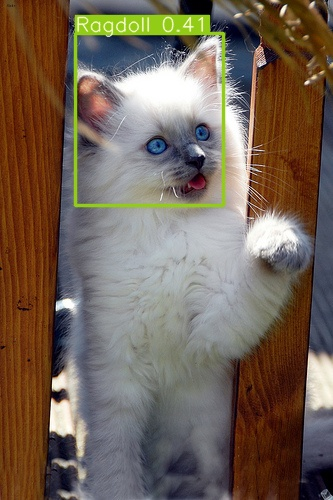

In [32]:
from IPython.display import Image,clear_output
Image(filename='/content/data/output/run_image/Ragdoll_101.jpg',width=400)

#### **test.py를 이용하여 Test 데이터를 Evaluation하기**

In [36]:
!cd yolov3; python test.py --weights /mydirve/ultra_workdir/pet/weights/best.pt  --data /content/ox_pet/ox_pet.yaml \
                           --project /content/data/output --name=test_result --exist-ok --img 640 --iou 0.65

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/content/ox_pet/ox_pet.yaml', device='', exist_ok=True, img_size=640, iou_thres=0.65, name='test_result', project='/content/data/output', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['/mydirve/ultra_workdir/pet/weights/best.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 261 layers, 61691290 parameters, 0 gradients, 155.5 GFLOPS
val: Scanning '/content/ox_pet/labels/val.cache' images and labels... 368 found, 0 missing, 0 empty, 0 corrupted: 100% 368/368 [00:00<?, ?it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 12/12 [00:25<00:00,  2.16s/it]
                 all         368         368       0.648       0.739       0.728       0.592
          Abyssinian         368          10       0.402         0.3       0.416       0.

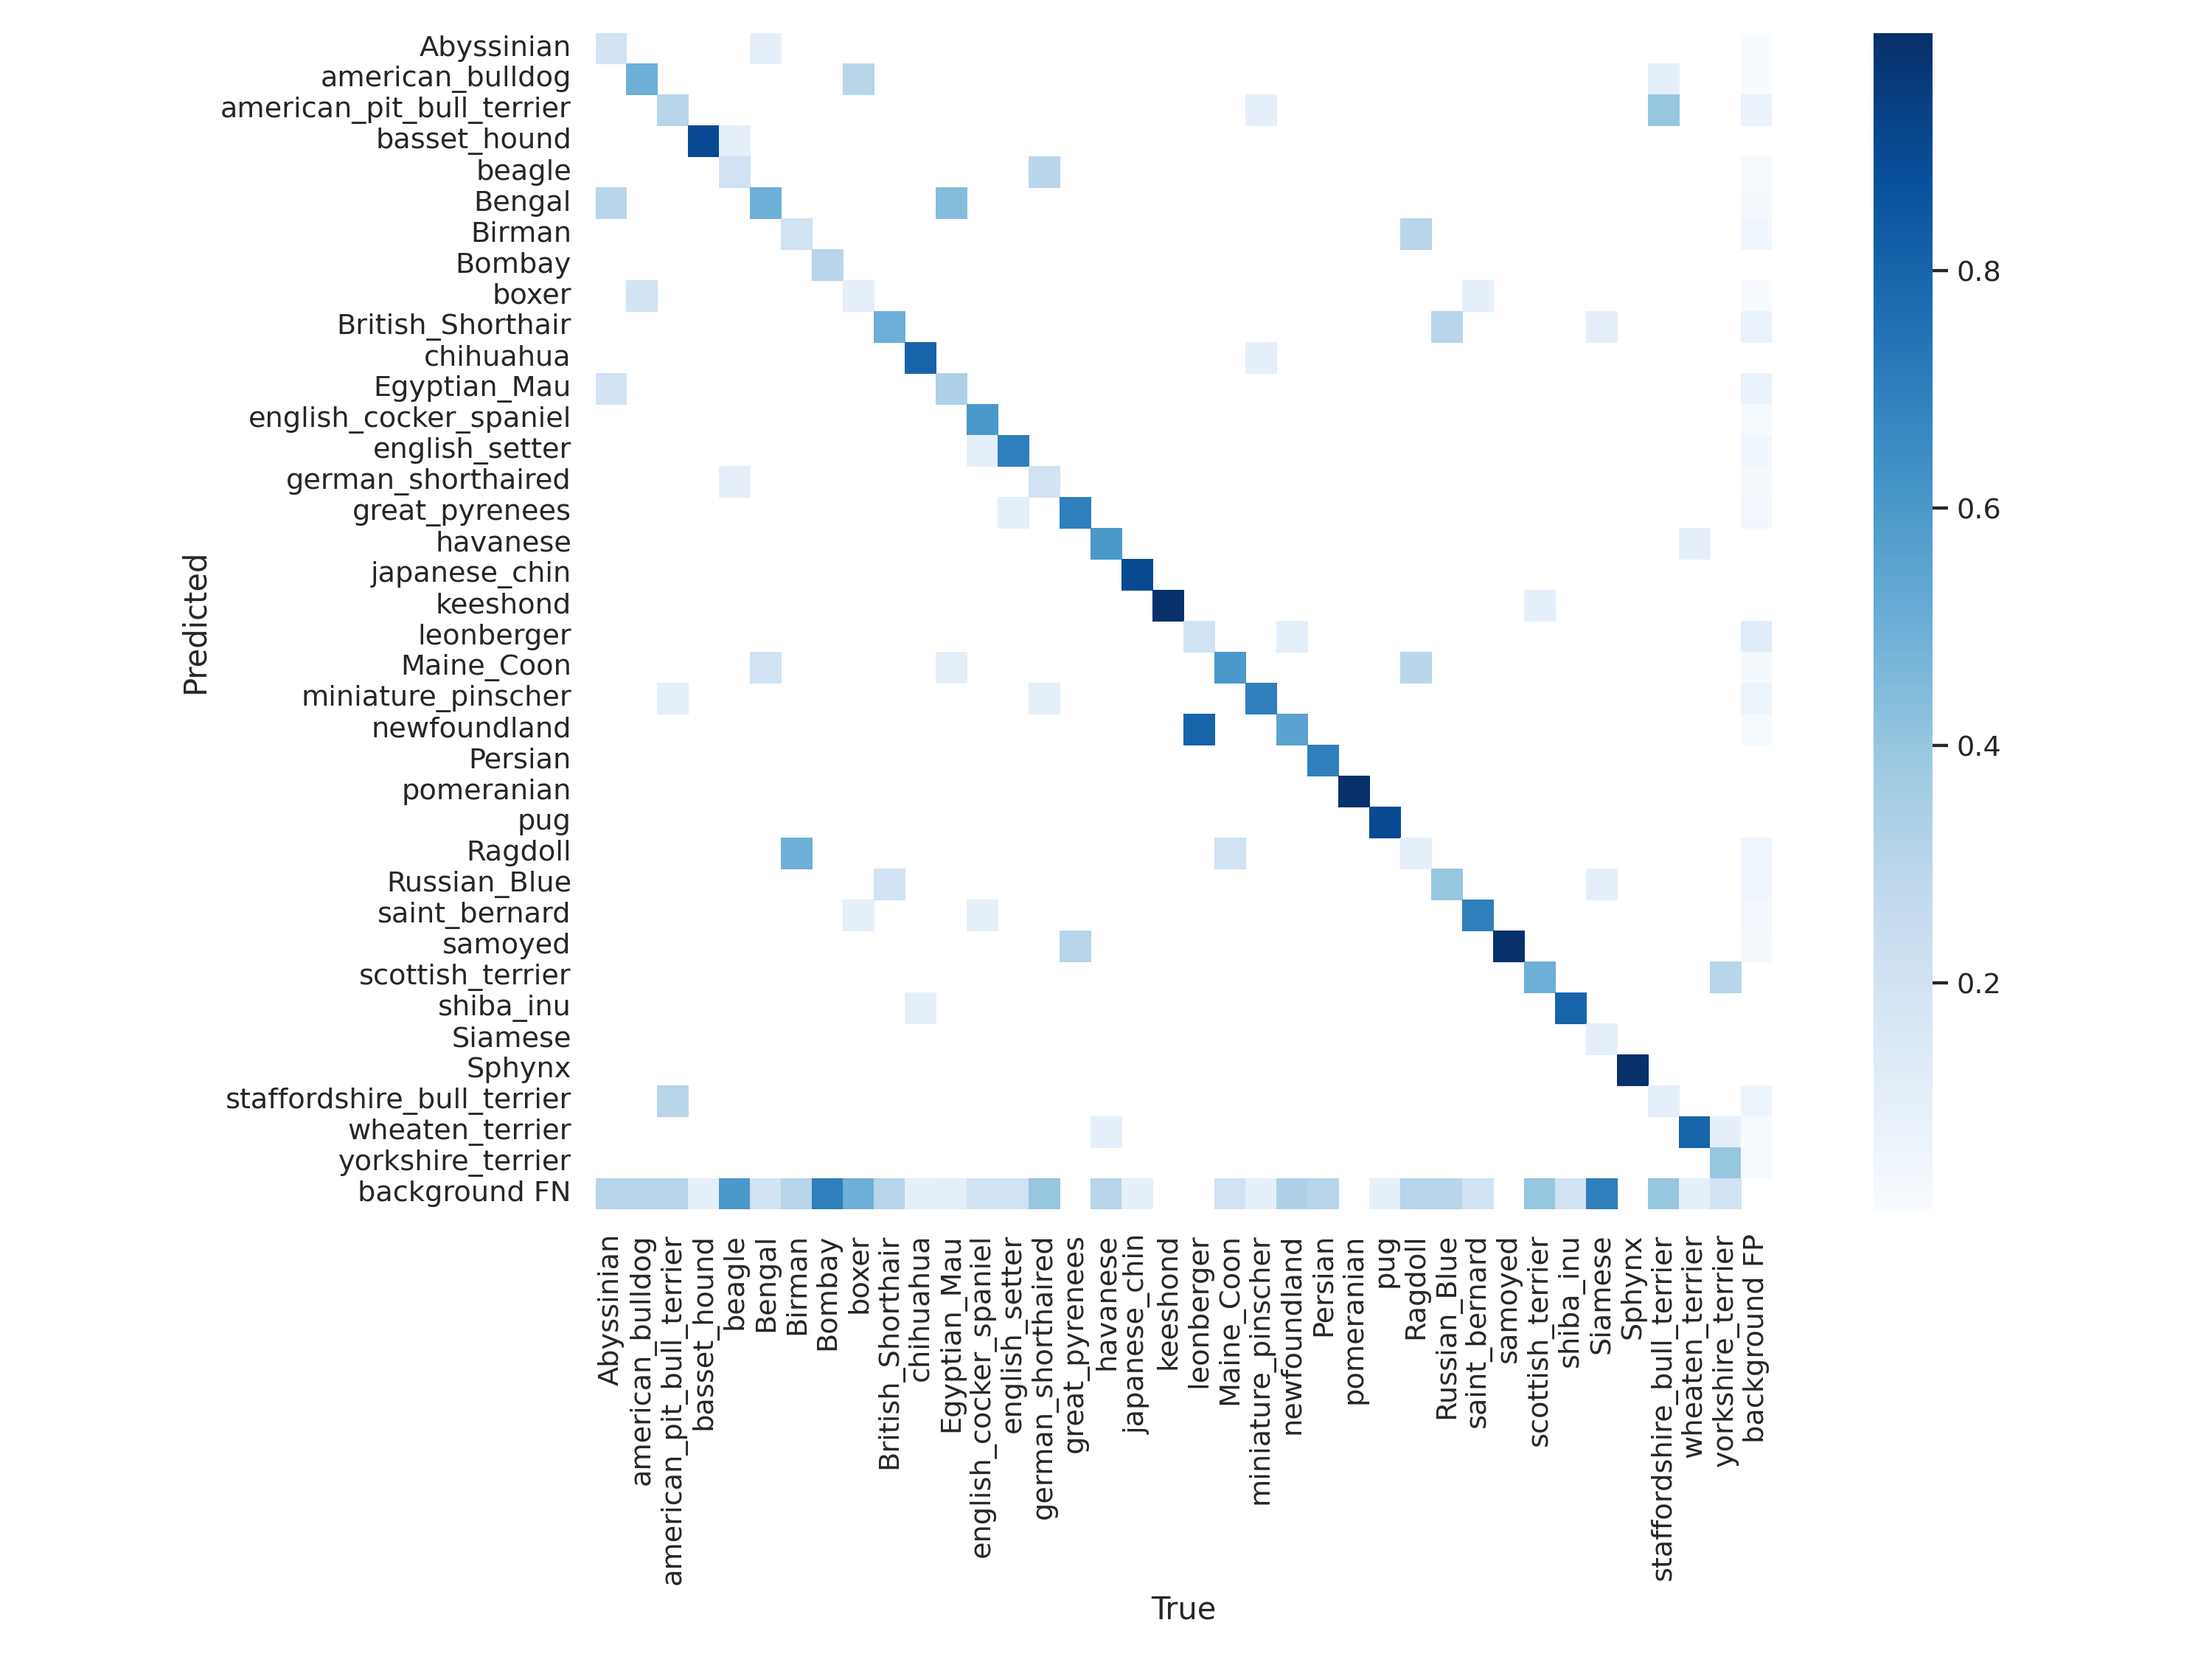

In [38]:
Image(filename='/content/data/output/test_result/confusion_matrix.png', width=800)